In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [14]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    d['var_est'] = result['model_params']['sigma2_est']
    return d

In [17]:
results = [parse_file(f) for f in files]

In [18]:
df = pd.DataFrame(results)
df = df.astype('float')

In [19]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt,var_est
0,0.233333,1.000000,0.378378,7.931837e+01,456.594418,2.867171e+02,2.884275e+08,16983.153876,11287.806731,89840.978514,7.413932e+04,2.722419e+02,20.0,0.20,1.000000e-08
1,0.777778,1.000000,0.875000,1.350335e-01,0.777317,2.040718e-01,1.993470e+01,4.464829,2.932704,26.164318,5.124148e-03,7.157174e-02,8.0,0.14,1.000000e-08
2,1.000000,1.000000,1.000000,5.074730e-06,0.000029,9.773719e-06,1.285289e-07,0.000359,0.000242,0.001742,3.303792e-11,5.746946e-06,0.0,0.10,1.168500e-01
3,0.545455,0.857143,0.666667,8.868613e-01,5.105197,1.669476e+00,9.712268e+01,9.855084,7.408470,41.766241,2.496506e-02,1.579781e-01,18.0,0.10,1.406608e+01
4,0.241379,1.000000,0.388889,1.791779e+01,103.143365,3.890570e+01,4.196713e+03,64.782043,36.805817,435.881202,1.078751e+00,1.038464e+00,20.0,0.16,1.000000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.777778,1.000000,0.875000,1.368511e-01,0.787780,2.447653e-01,4.005410e+01,6.328831,4.451330,27.822898,1.029577e-02,1.014519e-01,18.0,0.04,1.750967e+01
106,0.538462,1.000000,0.700000,1.006982e+00,5.796669,1.822037e+00,9.058244e+01,9.517481,6.915868,36.881664,2.328391e-02,1.525663e-01,6.0,0.20,1.000000e-08
107,1.000000,1.000000,1.000000,2.331550e-07,0.000001,3.702524e-07,5.114623e-11,0.000007,0.000005,0.000033,1.314697e-14,1.146419e-07,0.0,0.12,1.154920e-08
108,0.545455,0.857143,0.666667,8.087847e-01,4.655751,1.602929e+00,1.214154e+02,11.018864,8.282335,56.709368,3.120941e-02,1.766337e-01,16.0,0.12,1.575171e+01


<Axes: xlabel='noise', ylabel='dt'>

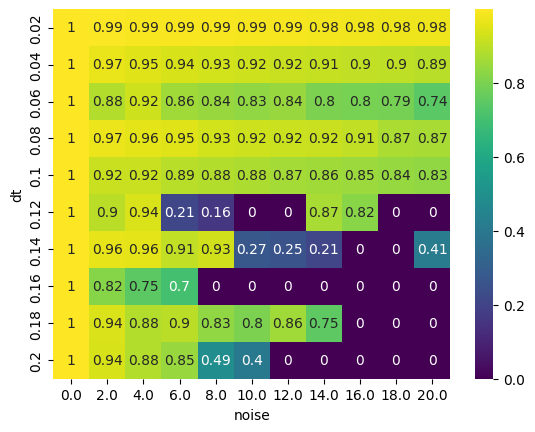

In [21]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

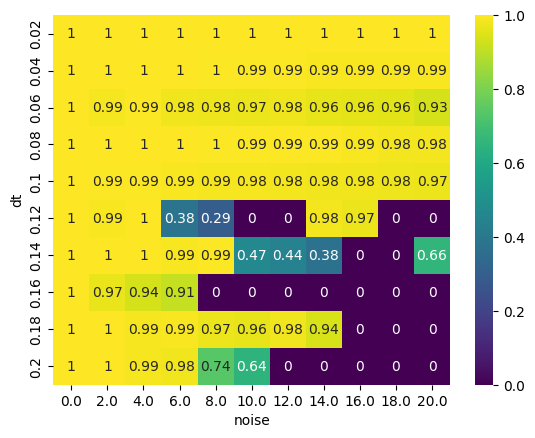

In [22]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

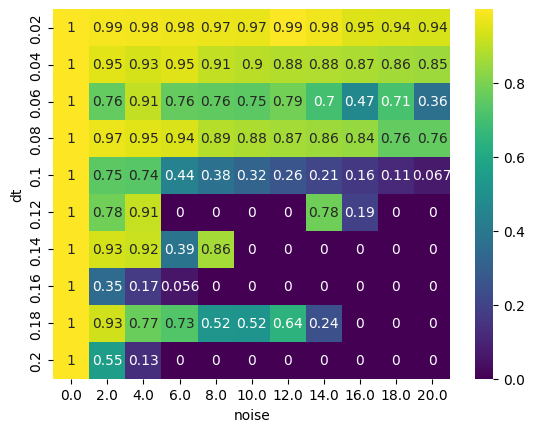

In [23]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

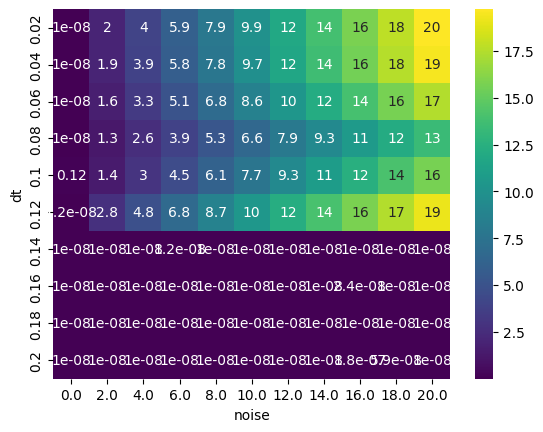

In [25]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='var_est')
sns.heatmap(pivot_df,annot=True, cmap="viridis")
